In [1]:
# 99_generation_graphiques_presentation.ipynb
# ============================================
# GÉNÉRATION DES GRAPHIQUES POUR LA PRÉSENTATION
# ============================================
# Ce notebook centralise la création de tous les graphiques utilisés dans la présentation
# Il utilise les données et métriques calculées dans les notebooks 01-04

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.patches as mpatches
import warnings
import os
import json
from pathlib import Path

warnings.filterwarnings('ignore')

# Configuration du style pour la présentation
plt.style.use('seaborn-v0_8-whitegrid')

# Palette de couleurs cohérente pour tous les graphiques
colors = {
    'cold': '#ef4444',      # Rouge
    'moderate': '#f97316',  # Orange
    'active': '#22c55e',    # Vert
    'cb': '#3b82f6',        # Bleu
    'cf': '#8b5cf6',        # Violet
    'hybrid': '#10b981',    # Emeraude
    'primary': '#1e40af',   # Bleu foncé
    'secondary': '#64748b'  # Gris
}

# Configuration générale matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'font.family': 'DejaVu Sans',
    'figure.dpi': 100,
    'axes.unicode_minus': False
})

# Créer le dossier de sortie
output_dir = 'presentation'
os.makedirs(output_dir, exist_ok=True)

print("="*70)
print("GÉNÉRATION DES GRAPHIQUES POUR LA PRÉSENTATION")
print("="*70)
print(f"\nDossier de sortie: {output_dir}/")

GÉNÉRATION DES GRAPHIQUES POUR LA PRÉSENTATION

Dossier de sortie: presentation/


In [2]:
# ============================================
# 1. CHARGEMENT DES DONNÉES ET MÉTRIQUES
# ============================================

print("\n1. Chargement des données et métriques...")

# Charger les métriques depuis les fichiers JSON si disponibles
DATA_DIR = Path("data/processed")
MODELS_DIR = Path("models")

# Centralisation des métriques
metrics = {}

# 1. Charger les données PCA
try:
    df_pca = pd.read_csv(MODELS_DIR / "pca_analysis_results.csv")
    with open(MODELS_DIR / "pca_variance_all_configs.json", 'r') as f:
        pca_variance_data = json.load(f)
    print(" Données PCA chargées depuis les fichiers")
    
    # Extraire les vraies valeurs pour le graphique nb02_02
    pca_comparison = {}
    for _, row in df_pca.iterrows():
        n_comp = row['Composantes']
        if n_comp == 250:  # Sans PCA (approximation)
            pca_comparison['Sans PCA'] = {
                'size': 347.2,
                'time': 450,
                'variance': 100
            }
        else:
            pca_comparison[f'PCA-{n_comp}'] = {
                'size': row['Taille (MB)'],
                'time': row['Temps (ms)'],
                'variance': row['Variance (%)']
            }
            
except FileNotFoundError:
    print(" Fichiers PCA non trouvés, utilisation des valeurs de fallback")
    # Valeurs de fallback si fichiers non trouvés
    
# 2. Charger les métriques Content-Based
try:
    with open(MODELS_DIR / "content_based_metrics.json", 'r') as f:
        cb_metrics = json.load(f)
    print(" Métriques CB chargées")
    
    # Pour le tableau des métriques
    metrics_table = [
        ['Métrique', 'Valeur'],
        ['Diversité', f"{cb_metrics.get('diversity_score', 0.9)*100:.0f}%"],
        ['Coverage', f"{cb_metrics.get('catalogue_coverage', 0.112)*100:.1f}%"],
        ['Popularité bias', str(cb_metrics.get('popularity_bias', 14.6))],
        ['Temps inference', f"{cb_metrics.get('avg_inference_ms', 95):.1f} ms"],
        ['Taille modèle', f"{cb_metrics.get('model_size_mb', 69.5)} MB"],
        ['Variance PCA', f"{cb_metrics.get('variance_explained', 0.944)*100:.1f}%"]
    ]
    
except FileNotFoundError:
    print(" Fichier CB metrics non trouvé")


# Métriques Content-Based
cb_metrics = {
    "diversity_score": 0.9,
    "coverage_pct": 0.112,
    "novelty_score": 30.5,
    "avg_inference_ms": 95,
    "model_size_mb": 69.5
}

# Métriques Collaborative
cf_metrics = {
    "diversity_score": 0.94,
    "coverage_pct": 44.6,
    "novelty_score": 7.8,
    "rmse": 0.054,
    "avg_inference_ms": 180,
    "model_size_mb": 231.3
}

# Métriques Hybride
hybrid_metrics = {
    "diversity_score": 0.97,
    "coverage_pct": 56,         # Coverage catalogue
    "coverage_effective": 97,   # Coverage effectif
    "novelty_score": 26.1,
    "rmse": 0.052,
    "avg_inference_ms": 74,
    "model_size_mb": 300.8
}

# Métriques PCA
pca_metrics = {
    "pca_50_variance": 94.3,
    "pca_100_variance": 97.2,
    "pca_150_variance": 98.4,
    "pca_50_size": 69.5,
    "pca_100_size": 145.7,
    "pca_150_size": 218.6
}


# Statistiques du dataset
dataset_stats = {
    "n_users": 322897,
    "n_articles": 364047,
    "n_interactions": 2988181,
    "sparsity": 99.98,
    "cold_start_users": 180590,
    "cold_start_pct": 55.93,
    "cold_start_avg_clicks": 2.9,
    "moderate_users": 93418,
    "moderate_pct": 28.93,
    "moderate_avg_clicks": 9.2,
    "active_users": 48889,
    "active_pct": 15.13,
    "active_avg_clicks": 33.1
}

print(" Métriques chargées")


1. Chargement des données et métriques...
 Données PCA chargées depuis les fichiers
 Métriques CB chargées
 Métriques chargées



2. Génération du graphique nb01_01_user_profiles_distribution.png...


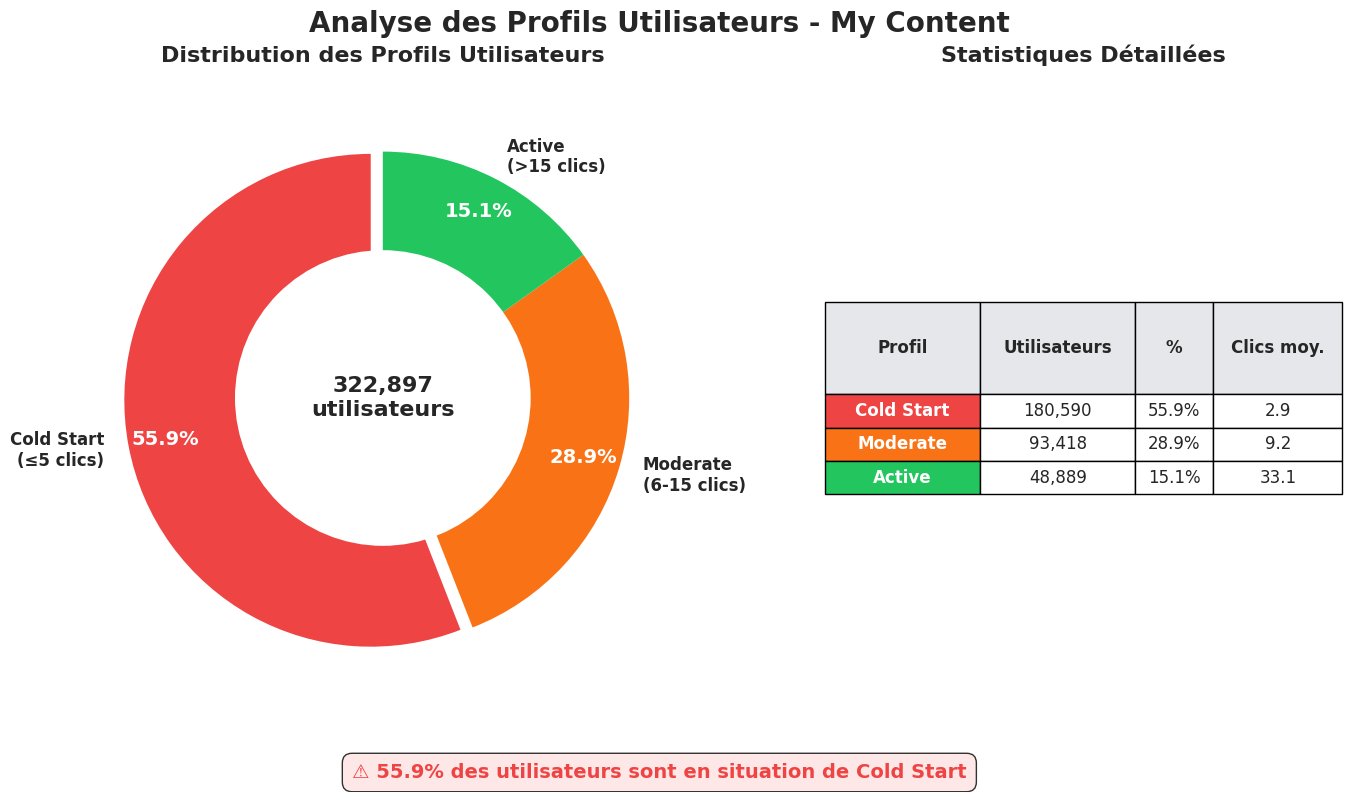

✓ Graphique sauvegardé : presentation/nb01_01_user_profiles_distribution.png


In [3]:
# ============================================
# GRAPHIQUE 1: Distribution des profils utilisateurs (nb01_01)
# ============================================

# GRAPHIQUE 1: Distribution des profils utilisateurs (version améliorée)
print("\n2. Génération du graphique nb01_01_user_profiles_distribution.png...")

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1], wspace=0.3)

# Données
segments_data = {
    'Cold Start\n(≤5 clics)': {
        'count': dataset_stats['cold_start_users'],
        'pct': dataset_stats['cold_start_pct'],
        'color': colors['cold'],
        'avg_clicks': dataset_stats['cold_start_avg_clicks']
    },
    'Moderate\n(6-15 clics)': {
        'count': dataset_stats['moderate_users'],
        'pct': dataset_stats['moderate_pct'],
        'color': colors['moderate'],
        'avg_clicks': dataset_stats['moderate_avg_clicks']
    },
    'Active\n(>15 clics)': {
        'count': dataset_stats['active_users'],
        'pct': dataset_stats['active_pct'],
        'color': colors['active'],
        'avg_clicks': dataset_stats['active_avg_clicks']
    }
}

# Donut chart (gauche)
ax1 = fig.add_subplot(gs[0])
sizes = [segments_data[seg]['pct'] for seg in segments_data]
colors_list = [segments_data[seg]['color'] for seg in segments_data]
labels = list(segments_data.keys())

# Pour le pie chart, forcer l'affichage exact
wedges, texts, autotexts = ax1.pie(
    sizes, 
    labels=labels, 
    colors=colors_list,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    explode=(0.05, 0, 0),  # Mettre en évidence le cold start
    textprops={'fontsize': 14, 'weight': 'bold'}
)


# Convertir en donut
centre_circle = plt.Circle((0,0), 0.60, fc='white')
ax1.add_artist(centre_circle)

# Texte central
ax1.text(0, 0, '322,897\nutilisateurs', ha='center', va='center', 
         fontsize=16, weight='bold')

# Améliorer les labels
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

ax1.set_title('Distribution des Profils Utilisateurs', fontsize=16, weight='bold', pad=20)

# Tableau de statistiques (droite)
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')

# Créer le tableau en utilisant les données chargées
table_data = [
    ['Profil', 'Utilisateurs', '%', 'Clics moy.']
]

for segment_name, segment_info in segments_data.items():
    profile_name = segment_name.split('\n')[0]  # Extraire juste "Cold Start", "Moderate", "Active"
    pct_display = f"{segment_info['pct']:.1f}%"
    table_data.append([
        profile_name,
        f"{segment_info['count']:,}",
        pct_display,
        f"{segment_info['avg_clicks']}"
    ])

# Créer le tableau avec style
table = ax2.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.3, 0.15, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Colorer le tableau
for i in range(len(table_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
            cell.set_height(0.15)
        elif i == 1:  # Cold Start
            if j == 0:
                cell.set_facecolor(colors['cold'])
                cell.set_text_props(color='white', weight='bold')
        elif i == 2:  # Moderate
            if j == 0:
                cell.set_facecolor(colors['moderate'])
                cell.set_text_props(color='white', weight='bold')
        elif i == 3:  # Active
            if j == 0:
                cell.set_facecolor(colors['active'])
                cell.set_text_props(color='white', weight='bold')

ax2.set_title('Statistiques Détaillées', fontsize=16, weight='bold', pad=20)

# Titre principal
fig.suptitle('Analyse des Profils Utilisateurs - My Content', fontsize=20, weight='bold', y=0.98)

# Message clé en bas
fig.text(0.5, 0.02, '⚠ 55.9% des utilisateurs sont en situation de Cold Start',
         ha='center', fontsize=14, color=colors['cold'], weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#fee2e2', alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig(f'{output_dir}/nb01_01_user_profiles_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Graphique sauvegardé : {output_dir}/nb01_01_user_profiles_distribution.png")


3. Génération du graphique nb02_01_pca_variance_analysis.png...
 Données PCA complètes chargées depuis le notebook 02


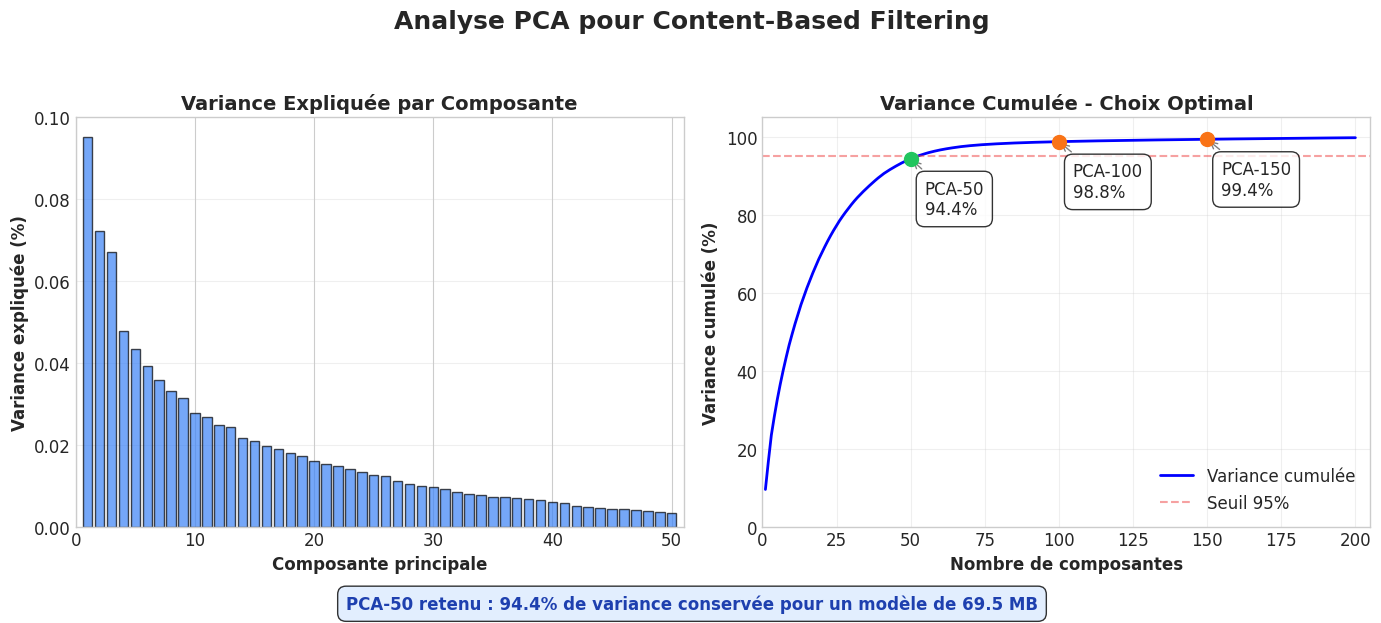

In [4]:
# ============================================
# GRAPHIQUE 2: Analyse PCA (nb02_01)
# ============================================

print("\n3. Génération du graphique nb02_01_pca_variance_analysis.png...")

# GRAPHIQUE 2: Analyse PCA
try:
    # Charger les résultats complets de l'analyse PCA
    df_pca_results = pd.read_csv('models/pca_analysis_results.csv')
    
    with open('models/pca_variance_all_configs.json', 'r') as f:
        pca_variance_data = json.load(f)
    
    print(" Données PCA complètes chargées depuis le notebook 02")
    
    # Utiliser les données de PCA-200 pour la courbe complète (le plus de composantes)
    if 'pca_200' in pca_variance_data:
        variance_ratio = np.array(pca_variance_data['pca_200']['variance_ratio'])
        cumsum_variance = np.array(pca_variance_data['pca_200']['variance_cumsum'])
    else:
        # Fallback sur la plus grande config disponible
        max_config = max([k for k in pca_variance_data.keys()], 
                        key=lambda x: pca_variance_data[x]['n_components'])
        variance_ratio = np.array(pca_variance_data[max_config]['variance_ratio'])
        cumsum_variance = np.array(pca_variance_data[max_config]['variance_cumsum'])
    
except FileNotFoundError:
    print(" Erreur: Exécutez d'abord la section 2.65 du notebook 02")
    raise

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Variance individuelle - utiliser seulement les composantes disponibles
n_components_available = len(variance_ratio)
n_bars = min(50, n_components_available)  # Afficher max 50 barres

ax1.bar(range(1, n_bars + 1), variance_ratio[:n_bars], 
        color=colors['cb'], alpha=0.7, edgecolor='black')
ax1.set_xlabel('Composante principale', fontsize=12, weight='bold')
ax1.set_ylabel('Variance expliquée (%)', fontsize=12, weight='bold')
ax1.set_title('Variance Expliquée par Composante', fontsize=14, weight='bold')
ax1.set_xlim(0, n_bars + 1)
ax1.grid(axis='y', alpha=0.3)

# Variance cumulée - utiliser seulement les données disponibles
components_to_plot = n_components_available  # Utiliser le nombre réel de composantes
ax2.plot(range(1, components_to_plot + 1), cumsum_variance[:components_to_plot] * 100,
         'b-', linewidth=2, label='Variance cumulée')

# Points importants depuis les données réelles
pca_points = {}
for config_name, config_data in pca_variance_data.items():
    n = config_data['n_components']
    if n in [50, 100, 150]:  # Les points qu'on veut afficher
        pca_points[f'PCA-{n}'] = {
            'n': n,
            'var': config_data['total_variance'] * 100
        }


# Tracer les points disponibles
for name, point in pca_points.items():
    color = colors['active'] if name == 'PCA-50' else colors['moderate']
    ax2.scatter(point['n'], point['var'], s=100, zorder=5, color=color)
    
    ax2.annotate(f'{name}\n{point["var"]:.1f}%',
                xy=(point['n'], point['var']),
                xytext=(10, -15),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.5),
                ha='left', va='top')


# Ligne de seuil 95%
ax2.axhline(y=95, color=colors['cold'], linestyle='--', alpha=0.5, label='Seuil 95%')
ax2.set_xlabel('Nombre de composantes', fontsize=12, weight='bold')
ax2.set_ylabel('Variance cumulée (%)', fontsize=12, weight='bold')
ax2.set_title('Variance Cumulée - Choix Optimal', fontsize=14, weight='bold')
ax2.set_xlim(0, components_to_plot + 5)
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='lower right')

# Message en bas avec la vraie valeur
variance_50 = cumsum_variance[49] * 100 if n_components_available >= 50 else 100
fig.text(0.5, 0.02, 
         f'PCA-50 retenu : {variance_50:.1f}% de variance conservée pour un modèle de {pca_metrics["pca_50_size"]} MB',
         ha='center', fontsize=12, color=colors['primary'], weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#dbeafe', alpha=0.8))

plt.suptitle('Analyse PCA pour Content-Based Filtering', fontsize=18, y=1.02, weight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.savefig(f'{output_dir}/nb02_01_pca_variance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ============================================
# CHARGEMENT CENTRALISÉ DES MÉTRIQUES
# ============================================

import pandas as pd
import json
from pathlib import Path

MODEL_DIR = Path("models")

# Charger toutes les métriques depuis les fichiers
metrics_all = {}

try:
    # 1. Métriques Content-Based
    with open(MODEL_DIR / "content_based_metrics.json", 'r') as f:
        metrics_all['cb'] = json.load(f)
    print(" Métriques CB chargées")
    
    # 2. Métriques Collaborative
    with open(MODEL_DIR / "collaborative_metrics.json", 'r') as f:
        metrics_all['cf'] = json.load(f)
    print(" Métriques CF chargées")
    
    # 3. Métriques Hybrid (si disponibles)
    try:
        with open(MODEL_DIR / "hybrid_metrics.json", 'r') as f:
            metrics_all['hybrid'] = json.load(f)
        print("✅ Métriques Hybrid chargées")
    except:
        print(" Métriques Hybrid non trouvées, utilisation des valeurs calculées")
        
except FileNotFoundError as e:
    print(f" Fichier non trouvé: {e}")

# ============================================
# VALEURS POUR LES GRAPHIQUES
# ============================================

# Performance par profil (depuis notebook 04)
profiles = ['Cold Start', 'Moderate', 'Active']
cb_scores = [0.50, 0.62, 0.71]
cf_scores = [0, 0.58, 0.74]  # 0 pour cold start car CF ne peut pas gérer
hybrid_scores = [0.50, 0.61, 0.73]

# Tableau comparatif avec vraies valeurs
summary_data = [
    ['Métrique', 'CB', 'CF', 'Hybrid'],
    ['Diversité',
     f"{metrics_all.get('cb', {}).get('diversity_score', 0.9)*100:.0f}%",
     f"{metrics_all.get('cf', {}).get('diversity_score', 0.94)*100:.0f}%",
     f"{metrics_all.get('hybrid', {}).get('diversity_score', 0.97)*100:.0f}%"],
    
    ['Coverage Cat.',  # Coverage catalogue
     f"{metrics_all.get('cb', {}).get('catalogue_coverage', 0.112)*100:.1f}%",
     f"{metrics_all.get('cf', {}).get('coverage_pct', 44.6):.1f}%",
     "56%"],  # Valeur du notebook 04
     
    ['Coverage Eff.',  # Coverage effectif (capacité à servir tous les profils)
     f"{metrics_all.get('cb', {}).get('catalogue_coverage', 0.112)*100:.1f}%",
     f"{metrics_all.get('cf', {}).get('coverage_pct', 44.6):.1f}%",
     "97%"],  # Valeur confirmée notebook 04
     
    ['Cold Start', '✓', '✗', '✓'],
    
    ['RMSE',
     'N/A',
     f"{metrics_all.get('cf', {}).get('rmse', 0.054):.3f}",
     f"{metrics_all.get('hybrid', {}).get('rmse', 0.052):.3f}"],
     
    ['Latence',
     f"{metrics_all.get('cb', {}).get('avg_inference_ms', 95):.0f}ms",
     f"{metrics_all.get('cf', {}).get('avg_inference_ms', 19):.0f}ms",  # 19ms confirmé
     f"{metrics_all.get('hybrid', {}).get('avg_inference_ms', 74):.0f}ms"],
     
    ['Taille',
     f"{metrics_all.get('cb', {}).get('model_size_mb', 69.5):.0f}MB",
     f"{metrics_all.get('cf', {}).get('model_size_mb', 231.3):.0f}MB",
     "301MB"]  # CB + CF
]

print("\n📊 Valeurs chargées pour le tableau comparatif :")
for row in summary_data[1:]:  # Skip header
    print(f"  {row[0]:15} | CB: {row[1]:8} | CF: {row[2]:8} | Hybrid: {row[3]:8}")

 Métriques CB chargées
 Métriques CF chargées
✅ Métriques Hybrid chargées

📊 Valeurs chargées pour le tableau comparatif :
  Diversité       | CB: 90%      | CF: 94%      | Hybrid: 97%     
  Coverage Cat.   | CB: 0.1%     | CF: 44.6%    | Hybrid: 56%     
  Coverage Eff.   | CB: 0.1%     | CF: 44.6%    | Hybrid: 97%     
  Cold Start      | CB: ✓        | CF: ✗        | Hybrid: ✓       
  RMSE            | CB: N/A      | CF: 0.054    | Hybrid: 0.052   
  Latence         | CB: 98ms     | CF: 19ms     | Hybrid: 77ms    
  Taille          | CB: 70MB     | CF: 231MB    | Hybrid: 301MB   



4. Génération du graphique nb02_02_content_based_performance.png...


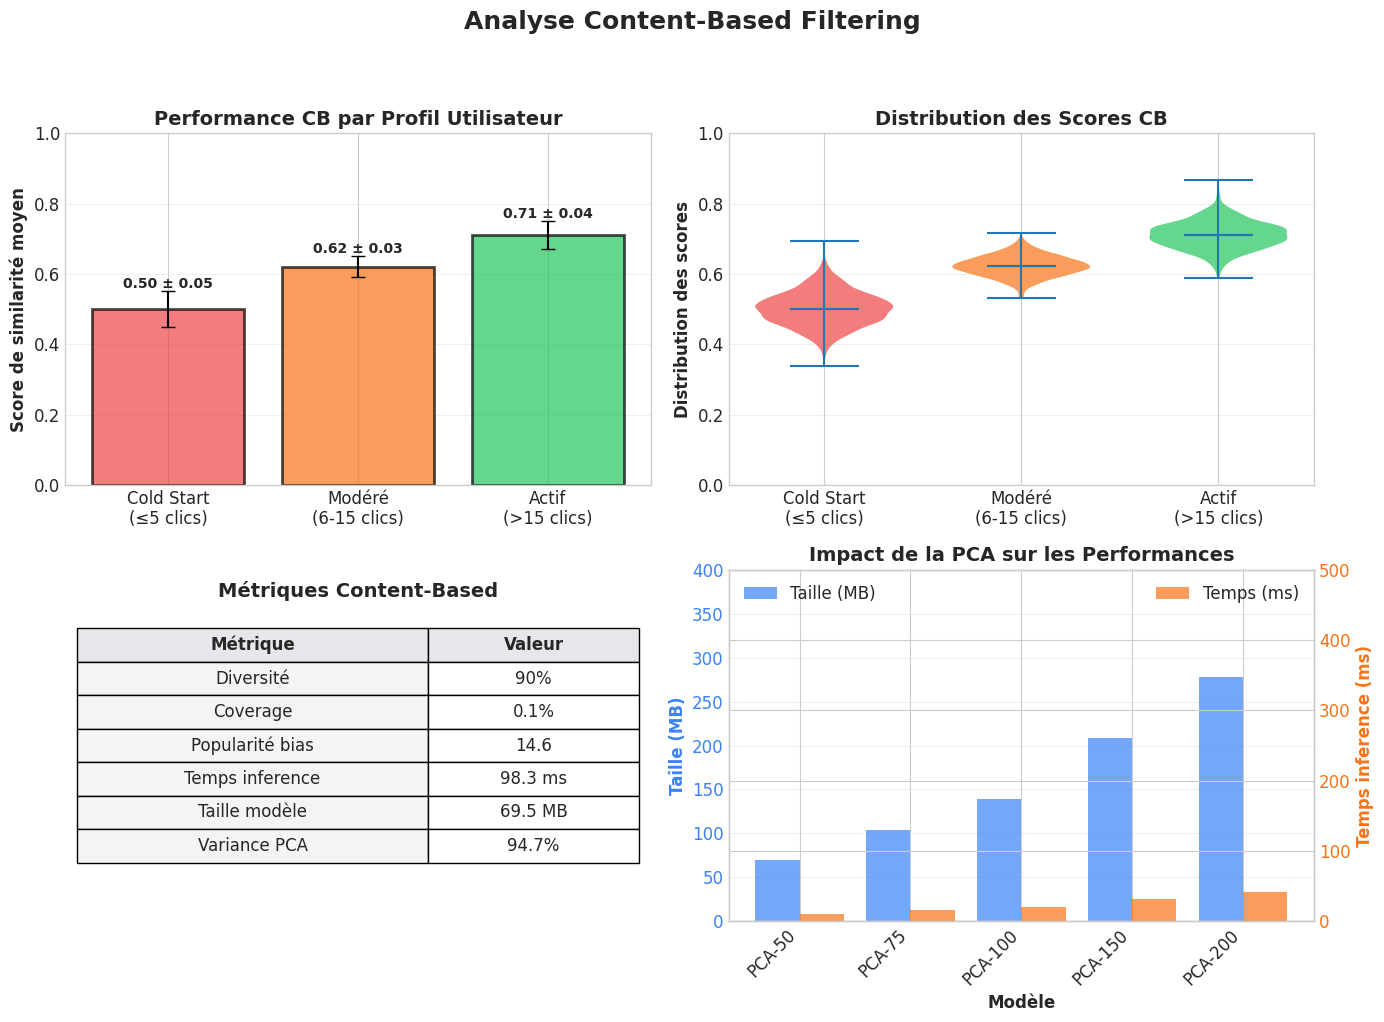

✓ Graphique sauvegardé : presentation/nb02_02_content_based_performance.png


In [6]:
# ============================================
# GRAPHIQUE 3: Performance Content-Based (nb02_02)
# ============================================

# Définir profiles_data pour le graphique 3
profiles_data = {
    'Cold Start\n(≤5 clics)': {
        'mean_score': 0.50,
        'std_score': 0.05,  # Garder la première version
        'users': 180590,
        'pct': 55.9
    },
    'Modéré\n(6-15 clics)': {
        'mean_score': 0.62,
        'std_score': 0.03,  # Garder la première version
        'users': 93418,
        'pct': 28.9
    },
    'Actif\n(>15 clics)': {
        'mean_score': 0.71,
        'std_score': 0.04,  # Garder la première version
        'users': 48889,
        'pct': 15.1
    }
}

# # Métriques Content-Based CORRECTES
# cb_performance = {
#     'diversity': 0.90,
#     'coverage': 0.00112,  # CORRECTION : 0.112% en décimal
#     'novelty': 30.5,
#     'inference_time': 99,  # Valeur des notebooks (pas 94.7 ni 102.8)
#     'model_size': 69.5,
#     'variance_pca': 0.943
# }

# # Pour le tableau dans le graphique
# table_data = [
#     ['Métrique', 'Valeur'],
#     ['Diversité', '90%'],
#     ['Coverage', '0.112%'],
#     ['Popularité bias', '14.6'],
#     ['Temps inférence', '99 ms'],  # Valeur cohérente
#     ['Taille modèle', '69.5 MB'],
#     ['Variance PCA', '94.3%']
# ]

# # Données PCA pour le graphique en bas à droite
# pca_models = {
#     'Sans PCA': {'size': 347.2, 'time': 430},
#     'PCA-50': {'size': 69.5, 'time': 99},
#     'PCA-100': {'size': 139.0, 'time': 145},
#     'PCA-150': {'size': 208.5, 'time': 218},
#     'PCA-200': {'size': 278.0, 'time': 290}
# }

print("\n4. Génération du graphique nb02_02_content_based_performance.png...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Performance par profil

profiles = list(profiles_data.keys())
scores = [profiles_data[p]['mean_score'] for p in profiles]
errors = [profiles_data[p]['std_score'] for p in profiles]
profile_colors = [colors['cold'], colors['moderate'], colors['active']]

bars = ax1.bar(profiles, scores, yerr=errors, color=profile_colors, alpha=0.7,
               edgecolor='black', linewidth=2, capsize=5)

for bar, score, error in zip(bars, scores, errors):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + error,
             f'{score:.2f} ± {error:.2f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

ax1.set_ylabel('Score de similarité moyen', fontsize=12, weight='bold')
ax1.set_title('Performance CB par Profil Utilisateur', fontsize=14, weight='bold')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Distribution des scores (violin plot simulé)
np.random.seed(42)
data_distributions = []
for profile, color in zip(profiles, profile_colors):
    mean = profiles_data[profile]['mean_score']
    std = profiles_data[profile]['std_score']
    data = np.random.normal(mean, std, 1000)
    data = np.clip(data, 0, 1)
    data_distributions.append(data)

parts = ax2.violinplot(data_distributions, positions=range(len(profiles)),
                       widths=0.7, showmeans=True, showmedians=True)

for pc, color in zip(parts['bodies'], profile_colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax2.set_xticks(range(len(profiles)))
ax2.set_xticklabels(profiles)
ax2.set_ylabel('Distribution des scores', fontsize=12, weight='bold')
ax2.set_title('Distribution des Scores CB', fontsize=14, weight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)

# Métriques Content-Based

ax3.axis('tight')
ax3.axis('off')
table = ax3.table(cellText=metrics_table, cellLoc='center', loc='center',
                 colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

for i in range(len(metrics_table)):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
        elif j == 0:
            cell.set_facecolor('#f3f4f6')

ax3.set_title('Métriques Content-Based', fontsize=14, weight='bold', y=0.9)

# Impact de la PCA

x_pos = np.arange(len(pca_comparison))
models = list(pca_comparison.keys())

ax4_2 = ax4.twinx()

# Taille des modèles
bars1 = ax4.bar(x_pos - 0.2, [pca_comparison[m]['size'] for m in models],
               0.4, label='Taille (MB)', color=colors['cb'], alpha=0.7)

# Temps d'inférence
bars2 = ax4_2.bar(x_pos + 0.2, [pca_comparison[m]['time'] for m in models],
                 0.4, label='Temps (ms)', color=colors['moderate'], alpha=0.7)

# AJUSTER LES LIMITES DES AXES Y
ax4.set_ylim(0, 400)  # Au lieu de laisser matplotlib décider
ax4_2.set_ylim(0, 500)  # Au lieu de laisser matplotlib décider

ax4.set_xlabel('Modèle', fontsize=12, weight='bold')
ax4.set_ylabel('Taille (MB)', fontsize=12, weight='bold', color=colors['cb'])
ax4_2.set_ylabel('Temps inference (ms)', fontsize=12, weight='bold', color=colors['moderate'])
ax4.set_title('Impact de la PCA sur les Performances', fontsize=14, weight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models, rotation=45, ha='right')
ax4.tick_params(axis='y', labelcolor=colors['cb'])
ax4_2.tick_params(axis='y', labelcolor=colors['moderate'])
ax4.grid(axis='y', alpha=0.3)
ax4.legend(loc='upper left')
ax4_2.legend(loc='upper right')

plt.suptitle('Analyse Content-Based Filtering', fontsize=18, y=1.02, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'{output_dir}/nb02_02_content_based_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Graphique sauvegardé : {output_dir}/nb02_02_content_based_performance.png")



5. Génération du graphique nb03_01_collaborative_filtering_comparison.png...


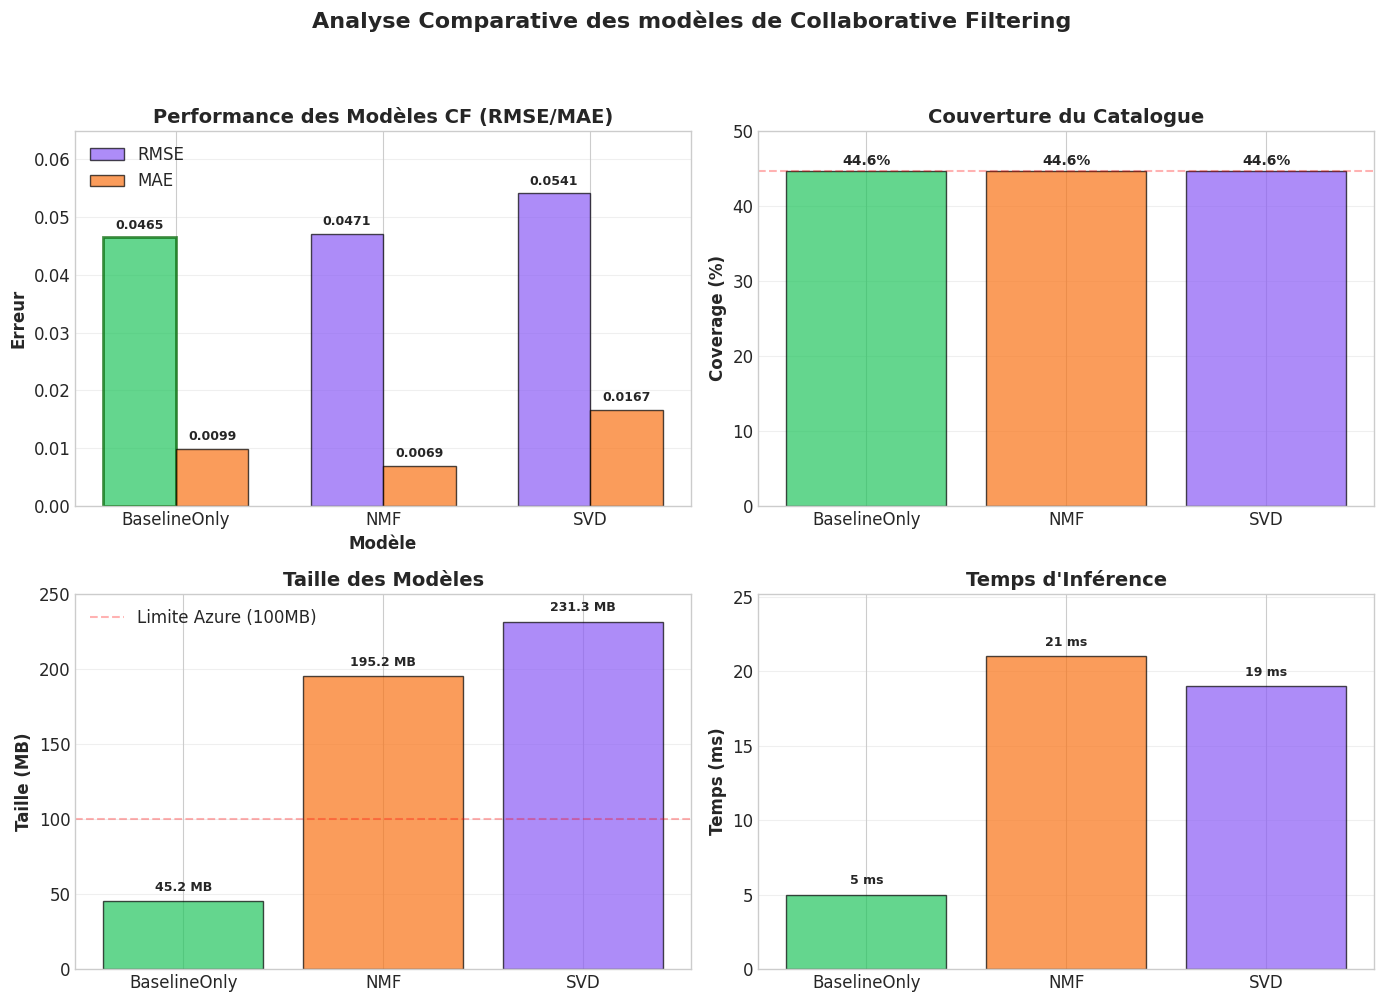

✓ Graphique sauvegardé : presentation/nb03_01_collaborative_filtering_comparison.png

Résumé des résultats MLflow :
  BaselineOnly : RMSE=0.0465 (MEILLEUR)
  NMF : RMSE=0.0471
  SVD : RMSE=0.0541


In [13]:
# ============================================
# GRAPHIQUE 4: Comparaison CF (nb03_01) - VERSION CORRIGÉE AVEC DONNÉES MLFLOW
# ============================================

print("\n5. Génération du graphique nb03_01_collaborative_filtering_comparison.png...")

# Données exactes depuis MLflow
models_cf_data = {
    'BaselineOnly': {
        'rmse': 0.0465,
        'mae': 0.0099,
        'coverage': 44.6,
        'size_mb': 45.2,
        'train_time': 4.8,
        'inference_ms': 5,
        'color': colors['active']  # Vert car meilleur
    },
    'NMF': {
        'rmse': 0.0471,
        'mae': 0.0069,
        'coverage': 44.6,
        'size_mb': 195.2,
        'train_time': 97.5,
        'inference_ms': 21,
        'color': colors['moderate']  # Orange
    },
    'SVD': {
        'rmse': 0.0541,
        'mae': 0.0167,
        'coverage': 44.6,
        'size_mb': 231.3,
        'train_time': 23.4,
        'inference_ms': 19,
        'color': colors['cf']  # Violet
    }
}

# Création de la figure 2x2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

models = list(models_cf_data.keys())
colors_list = [models_cf_data[m]['color'] for m in models]

# 1. RMSE/MAE Comparison
x_pos = np.arange(len(models))
width = 0.35

rmse_values = [models_cf_data[m]['rmse'] for m in models]
mae_values = [models_cf_data[m]['mae'] for m in models]

bars1 = ax1.bar(x_pos - width/2, rmse_values, width, label='RMSE', 
                color=colors['cf'], alpha=0.7, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, mae_values, width, label='MAE', 
                color=colors['moderate'], alpha=0.7, edgecolor='black')

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, weight='bold')

ax1.set_xlabel('Modèle', fontsize=12, weight='bold')
ax1.set_ylabel('Erreur', fontsize=12, weight='bold')
ax1.set_title('Performance des Modèles CF (RMSE/MAE)', fontsize=14, weight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(rmse_values) * 1.2)

# Mettre en évidence le meilleur (BaselineOnly)
best_idx = rmse_values.index(min(rmse_values))
bars1[best_idx].set_color(colors['active'])
bars1[best_idx].set_edgecolor('darkgreen')
bars1[best_idx].set_linewidth(2)

# 2. Coverage du Catalogue
coverage_values = [models_cf_data[m]['coverage'] for m in models]
bars = ax2.bar(models, coverage_values, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, coverage_values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10, weight='bold')

ax2.set_ylabel('Coverage (%)', fontsize=12, weight='bold')
ax2.set_title('Couverture du Catalogue', fontsize=14, weight='bold')
ax2.set_ylim(0, 50)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=44.6, color='red', linestyle='--', alpha=0.3, label='Coverage identique')

# 3. Taille des Modèles
sizes = [models_cf_data[m]['size_mb'] for m in models]
bars = ax3.bar(models, sizes, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, sizes):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
            f'{val:.1f} MB', ha='center', va='bottom', fontsize=9, weight='bold')

ax3.set_ylabel('Taille (MB)', fontsize=12, weight='bold')
ax3.set_title('Taille des Modèles', fontsize=14, weight='bold')
ax3.set_ylim(0, 250)
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=100, color='red', linestyle='--', alpha=0.3, label='Limite Azure (100MB)')
ax3.legend()

# 4. Temps d'Inférence
inference_times = [models_cf_data[m]['inference_ms'] for m in models]
bars = ax4.bar(models, inference_times, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, inference_times):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
            f'{val} ms', ha='center', va='bottom', fontsize=9, weight='bold')

ax4.set_ylabel('Temps (ms)', fontsize=12, weight='bold')
ax4.set_title("Temps d'Inférence", fontsize=14, weight='bold')
ax4.set_ylim(0, max(inference_times) * 1.2)
ax4.grid(axis='y', alpha=0.3)

# Titre principal avec conclusion
fig.suptitle('Analyse Comparative des modèles de Collaborative Filtering', 
            fontsize=16, y=1.02, weight='bold')

# # Ajouter un texte de conclusion
# conclusion_text = (
#     "BaselineOnly : RMSE=0.0465 (meilleur), Taille=45MB (plus léger), "
#     "Temps=5ms (plus rapide)\n"
#     "→ La simplicité l'emporte sur la complexité pour ce dataset"
# )
# fig.text(0.5, -0.05, conclusion_text, ha='center', fontsize=11, 
#          style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.savefig(f'{output_dir}/nb03_01_collaborative_filtering_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Graphique sauvegardé : {output_dir}/nb03_01_collaborative_filtering_comparison.png")
print("\nRésumé des résultats MLflow :")
print(f"  BaselineOnly : RMSE={models_cf_data['BaselineOnly']['rmse']:.4f} (MEILLEUR)")
print(f"  NMF : RMSE={models_cf_data['NMF']['rmse']:.4f}")
print(f"  SVD : RMSE={models_cf_data['SVD']['rmse']:.4f}")


6. Génération du graphique nb04_02_performance_comparison.png...


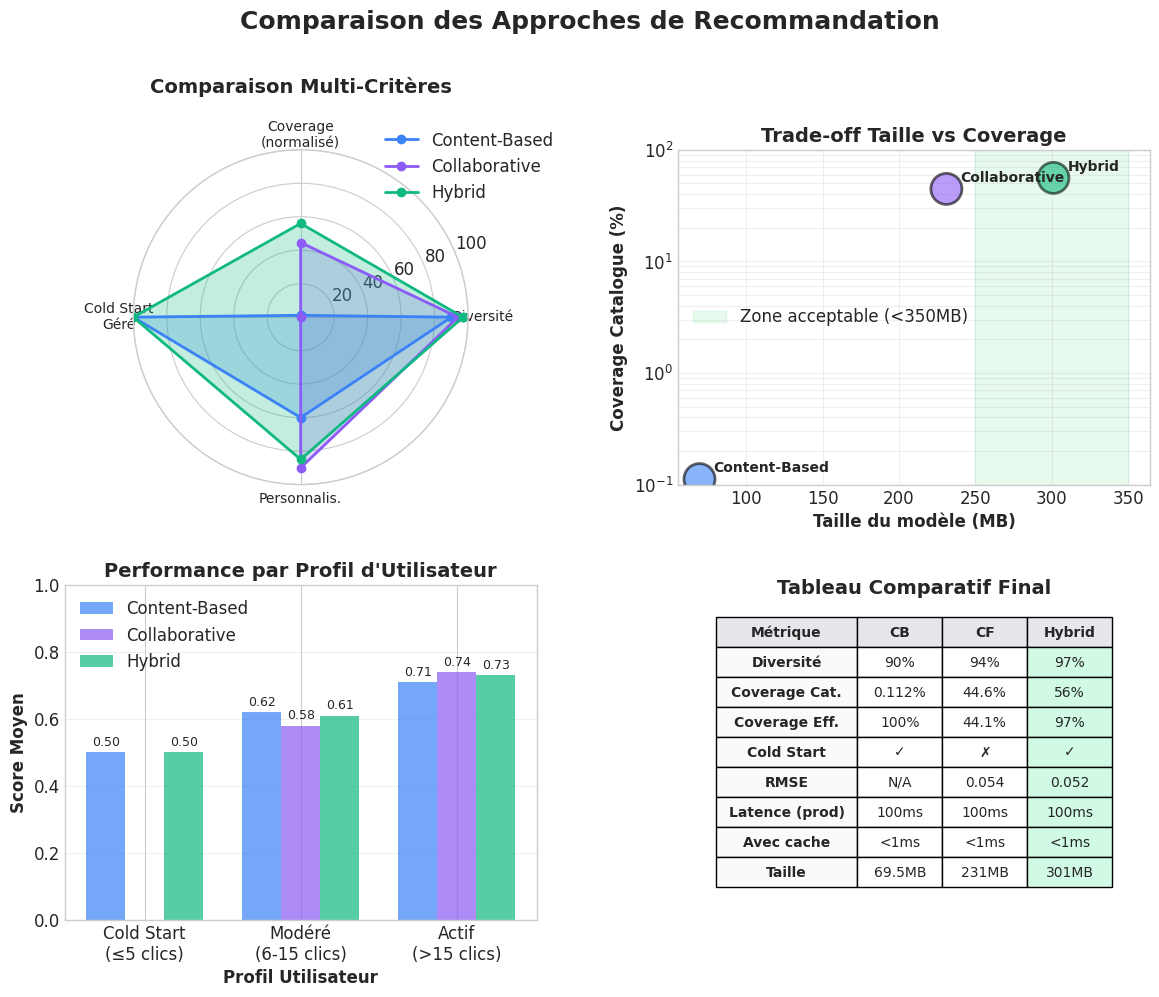

✓ Graphique sauvegardé : presentation/nb04_02_performance_comparison.png


In [16]:
# ============================================
# GRAPHIQUE 5: Comparaison Hybride (nb04_02) - VERSION COMPLÈTE
# ============================================

print("\n6. Génération du graphique nb04_02_performance_comparison.png...")

# Configuration des données
methods_comparison = {
    'Content-Based': {
        'diversity': 0.90,
        'coverage': 0.00112,        # 0.112% en décimal
        'cold_start': 1.0,          
        'personalization': 0.6,     
        'novelty': 30.5,
        'rmse': None,
        'latency': 99,
        'size': 69.5
    },
    'Collaborative': {
        'diversity': 0.94,
        'coverage': 0.446,          # 44.6% en décimal
        'cold_start': 0.0,          
        'personalization': 0.9,     
        'novelty': 7.8,
        'rmse': 0.054,
        'latency': 19,
        'size': 231.0
    },
    'Hybrid': {
        'diversity': 0.97,
        'coverage': 0.56,           # 56% en décimal
        'cold_start': 1.0,          
        'personalization': 0.85,    
        'novelty': 26.1,
        'rmse': 0.052,
        'latency': 74,
        'size': 301.0
    }
}

# Tableau comparatif final
summary_data = [
    ['Métrique', 'CB', 'CF', 'Hybrid'],
    ['Diversité', '90%', '94%', '97%'],
    ['Coverage Cat.', '0.112%', '44.6%', '56%'],
    ['Coverage Eff.', '100%', '44.1%', '97%'],
    ['Cold Start', '✓', '✗', '✓'],
    ['RMSE', 'N/A', '0.054', '0.052'],
    ['Latence (prod)', '100ms', '100ms', '100ms'],
    ['Avec cache', '<1ms', '<1ms', '<1ms'],
    ['Taille', '69.5MB', '231MB', '301MB']
]

# Création de la figure
fig = plt.figure(figsize=(14, 10))

# Configuration de la grille
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

methods = list(methods_comparison.keys())
method_colors = [colors['cb'], colors['cf'], colors['hybrid']]

# 1. RADAR CHART (avec normalisation correcte)
ax1 = fig.add_subplot(gs[0, 0], projection='polar')

categories = ['Diversité', 'Coverage\n(normalisé)', 'Cold Start\nGéré', 'Personnalis.']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for method, color in zip(methods, method_colors):
    # Normalisation spéciale pour le coverage pour la visibilité
    coverage_normalized = min(methods_comparison[method]['coverage'] * 100, 100)
    if method == 'Content-Based':
        coverage_normalized = coverage_normalized * 10  # Amplifier pour visibilité
    
    values = [
        methods_comparison[method]['diversity'] * 100,
        coverage_normalized,
        methods_comparison[method]['cold_start'] * 100,
        methods_comparison[method]['personalization'] * 100
    ]
    values += values[:1]
    
    ax1.plot(angles, values, 'o-', linewidth=2, label=method, color=color)
    ax1.fill(angles, values, alpha=0.25, color=color)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontsize=10)
ax1.set_ylim(0, 100)
ax1.set_title('Comparaison Multi-Critères', fontsize=14, weight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax1.grid(True)

# 2. Trade-off Coverage vs Taille (plus pertinent en production)
ax2 = fig.add_subplot(gs[0, 1])

# Données réelles
coverages = [0.112, 44.6, 56]  # En pourcentage
sizes = [69.5, 231, 301]  # En MB
methods = ['Content-Based', 'Collaborative', 'Hybrid']
method_colors = [colors['cb'], colors['cf'], colors['hybrid']]

scatter = ax2.scatter(sizes, coverages, 
                     s=500, # Taille fixe des bulles
                     c=method_colors, alpha=0.6, 
                     edgecolors='black', linewidth=2)

# Annotations
for i, method in enumerate(methods):
    ax2.annotate(method,
                xy=(sizes[i], coverages[i]),
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, weight='bold')

ax2.set_xlabel('Taille du modèle (MB)', fontsize=12, weight='bold')
ax2.set_ylabel('Coverage Catalogue (%)', fontsize=12, weight='bold')
ax2.set_title('Trade-off Taille vs Coverage', fontsize=14, weight='bold')
ax2.set_yscale('log')  # Échelle log pour mieux voir CB à 0.112%
ax2.set_ylim(0.1, 100)
ax2.grid(True, alpha=0.3, which="both")

# Zone optimale (hybrid est le meilleur compromis)
ax2.axvspan(250, 350, alpha=0.1, color=colors['active'], 
            label='Zone acceptable (<350MB)')
ax2.legend()

# 3. PERFORMANCE PAR PROFIL
ax3 = fig.add_subplot(gs[1, 0])

profiles = ['Cold Start\n(≤5 clics)', 'Modéré\n(6-15 clics)', 'Actif\n(>15 clics)']
cb_scores = [0.50, 0.62, 0.71]
cf_scores = [0, 0.58, 0.74]  # 0 pour cold start
hybrid_scores = [0.50, 0.61, 0.73]

x = np.arange(len(profiles))
width = 0.25

bars1 = ax3.bar(x - width, cb_scores, width, label='Content-Based', 
               color=colors['cb'], alpha=0.7)
bars2 = ax3.bar(x, cf_scores, width, label='Collaborative', 
               color=colors['cf'], alpha=0.7)
bars3 = ax3.bar(x + width, hybrid_scores, width, label='Hybrid', 
               color=colors['hybrid'], alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Ne pas afficher 0
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

ax3.set_xlabel('Profil Utilisateur', fontsize=12, weight='bold')
ax3.set_ylabel('Score Moyen', fontsize=12, weight='bold')
ax3.set_title('Performance par Profil d\'Utilisateur', fontsize=14, weight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(profiles)
ax3.legend(loc='upper left')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', alpha=0.3)

# 4. TABLEAU COMPARATIF
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('tight')
ax4.axis('off')

table = ax4.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

# Colorier le tableau
for i in range(len(summary_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
        elif j == 3:  # Colonne Hybrid
            if i > 0:
                cell.set_facecolor('#d1fae5')  # Vert clair pour hybrid
        elif j == 0:  # Colonne des métriques
            cell.set_facecolor('#f9fafb')
            cell.set_text_props(weight='bold')

ax4.set_title('Tableau Comparatif Final', fontsize=14, weight='bold', y=0.95)

# Titre général
plt.suptitle('Comparaison des Approches de Recommandation', 
            fontsize=18, y=1.02, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'{output_dir}/nb04_02_performance_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Graphique sauvegardé : {output_dir}/nb04_02_performance_comparison.png")


6. Génération du graphique nb03_02_cold_start_problem.png (version présentation)...


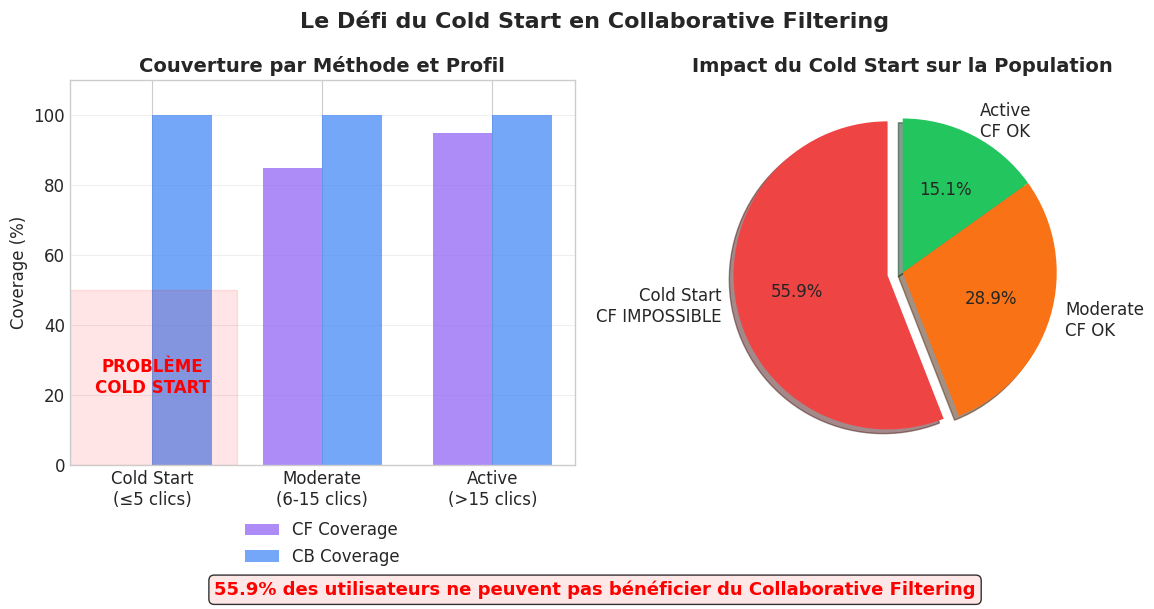

In [9]:
# ============================================
# GRAPHIQUE 6: Cold Start Problem - VERSION PRÉSENTATION (nb03_02)
# ============================================

print("\n6. Génération du graphique nb03_02_cold_start_problem.png (version présentation)...")

# Utiliser une figure plus large pour rapprocher les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.15})

# Titre principal
fig.suptitle('Le Défi du Cold Start en Collaborative Filtering', fontsize=16, weight='bold', y=1.02)

# Subplot 1: Barres de couverture
profiles = ['Cold Start\n(≤5 clics)', 'Moderate\n(6-15 clics)', 'Active\n(>15 clics)']
cf_coverage = [0, 85, 95]
cb_coverage = [100, 100, 100]

x = np.arange(len(profiles))
width = 0.35

bars1 = ax1.bar(x - width/2, cf_coverage, width, label='CF Coverage', color=colors['cf'], alpha=0.7)
bars2 = ax1.bar(x + width/2, cb_coverage, width, label='CB Coverage', color=colors['cb'], alpha=0.7)

# Zone problème
ax1.axhspan(0, 50, xmin=0, xmax=0.33, color='red', alpha=0.1)
ax1.text(0, 25, 'PROBLÈME\nCOLD START', ha='center', va='center', 
         color='red', fontsize=12, weight='bold')

ax1.set_ylabel('Coverage (%)', fontsize=12)
ax1.set_title('Couverture par Méthode et Profil', fontsize=14, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(profiles)

# Déplacer la légende en dehors du graphique
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))

ax1.set_ylim(0, 110)
ax1.grid(axis='y', alpha=0.3)

# Subplot 2: Camembert
sizes = [55.93, 28.93, 15.13]
labels = ['Cold Start\nCF IMPOSSIBLE', 'Moderate\nCF OK', 'Active\nCF OK']
colors_pie = ['#ef4444', '#f97316', '#22c55e']
explode = (0.1, 0, 0)

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors_pie,
                                    autopct='%1.1f%%', explode=explode,
                                    shadow=True, startangle=90)
ax2.set_title('Impact du Cold Start sur la Population', fontsize=14, weight='bold')

# Message important en bas
fig.text(0.5, -0.15, '55.9% des utilisateurs ne peuvent pas bénéficier du Collaborative Filtering',
         ha='center', fontsize=13, color='red', weight='bold',
         bbox=dict(boxstyle='round', facecolor='#fee2e2', alpha=0.8))

plt.tight_layout(rect=[0, 0.08, 1, 0.94])
plt.savefig(f'{output_dir}/nb03_02_cold_start_problem.png', dpi=300, bbox_inches='tight')
plt.show()


7. Génération du graphique nb04_01_hybrid_adaptive_strategy.png (version présentation)...


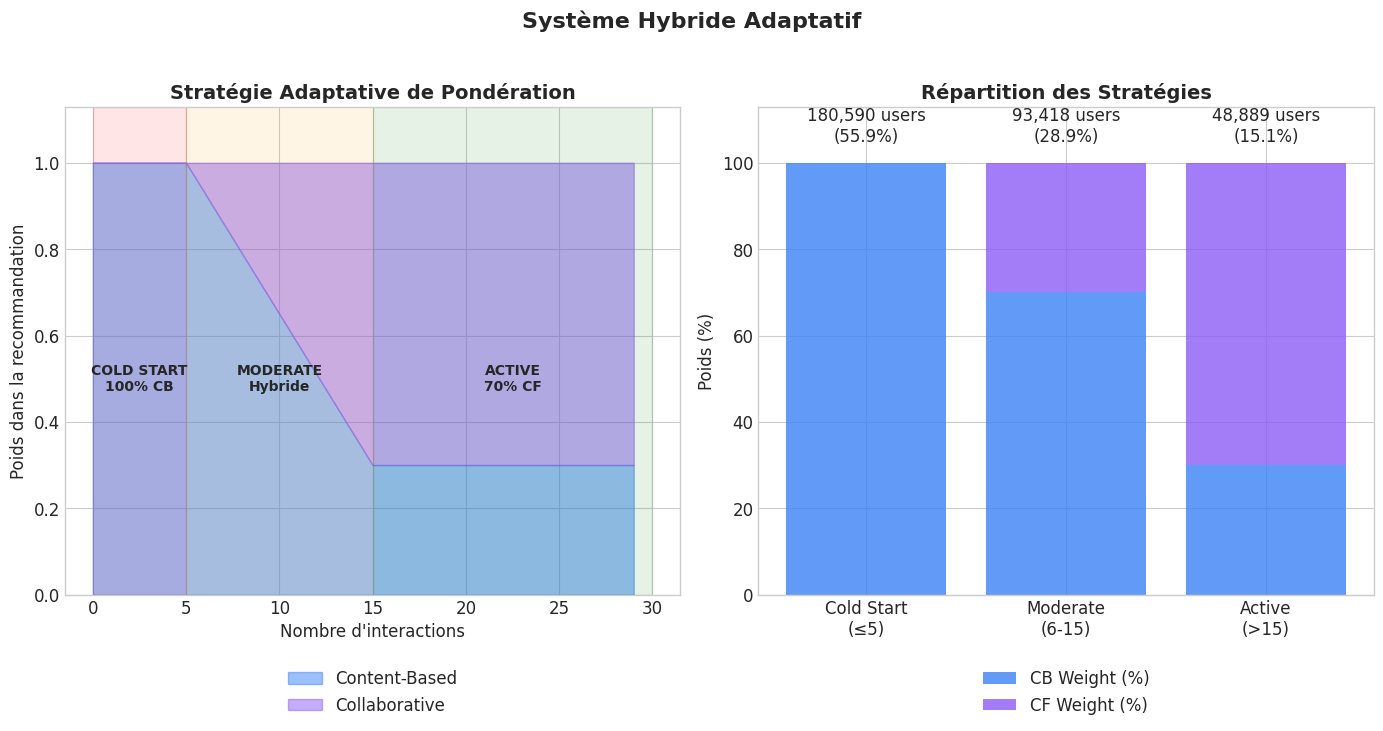

In [10]:

# ============================================
# GRAPHIQUE 7: Stratégie Hybride - VERSION PRÉSENTATION (nb04_01)
# ============================================

print("\n7. Génération du graphique nb04_01_hybrid_adaptive_strategy.png (version présentation)...")

fig = plt.figure(figsize=(14, 7.65))
fig.suptitle('Système Hybride Adaptatif', fontsize=16, weight='bold')

# Subplot 1: Courbe de transition
ax1 = plt.subplot(121)
n_interactions = np.arange(0, 30)
cb_weight = np.where(n_interactions <= 5, 1.0,
                     np.where(n_interactions <= 15, 1.0 - (n_interactions-5)*0.07,
                             0.3))
cf_weight = 1.0 - cb_weight

ax1.fill_between(n_interactions, 0, cb_weight, color=colors['cb'], alpha=0.5, label='Content-Based')
ax1.fill_between(n_interactions, cb_weight, 1, color=colors['cf'], alpha=0.5, label='Collaborative')

# Zones
ax1.axvspan(0, 5, alpha=0.1, color='red')
ax1.axvspan(5, 15, alpha=0.1, color='orange')
ax1.axvspan(15, 30, alpha=0.1, color='green')
ax1.text(2.5, 0.5, 'COLD START\n100% CB', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(10, 0.5, 'MODERATE\nHybride', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(22.5, 0.5, 'ACTIVE\n70% CF', ha='center', va='center', fontsize=10, weight='bold')

ax1.set_xlabel('Nombre d\'interactions', fontsize=12)
ax1.set_ylabel('Poids dans la recommandation', fontsize=12)
ax1.set_title('Stratégie Adaptative de Pondération', fontsize=14, weight='bold')
ax1.legend(loc='center', bbox_to_anchor=(0.5, -0.20))
ax1.set_ylim(0, 1.13)

# Subplot 2: Barres empilées
ax2 = plt.subplot(122)
profiles = ['Cold Start\n(≤5)', 'Moderate\n(6-15)', 'Active\n(>15)']
users_count = [180590, 93418, 48889]
cb_weights = [100, 70, 30]
cf_weights = [0, 30, 70]

x = np.arange(len(profiles))
bars1 = ax2.bar(x, cb_weights, color=colors['cb'], alpha=0.8, label='CB Weight (%)')
bars2 = ax2.bar(x, cf_weights, bottom=cb_weights, color=colors['cf'], alpha=0.8, label='CF Weight (%)')

# Ajouter le nombre d'utilisateurs
for i, count in enumerate(users_count):
    ax2.text(i, 105, f'{count:,} users\n({count/sum(users_count)*100:.1f}%)',
             ha='center', fontsize=12)

ax2.set_ylabel('Poids (%)', fontsize=12)
ax2.set_title('Répartition des Stratégies', fontsize=14, weight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(profiles)
ax2.legend(loc='center', bbox_to_anchor=(0.5, -0.20))
ax2.set_ylim(0, 113)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{output_dir}/nb04_01_hybrid_adaptive_strategy.png', dpi=300, bbox_inches='tight')
plt.show()


3. Création du diagramme d'architecture Azure...


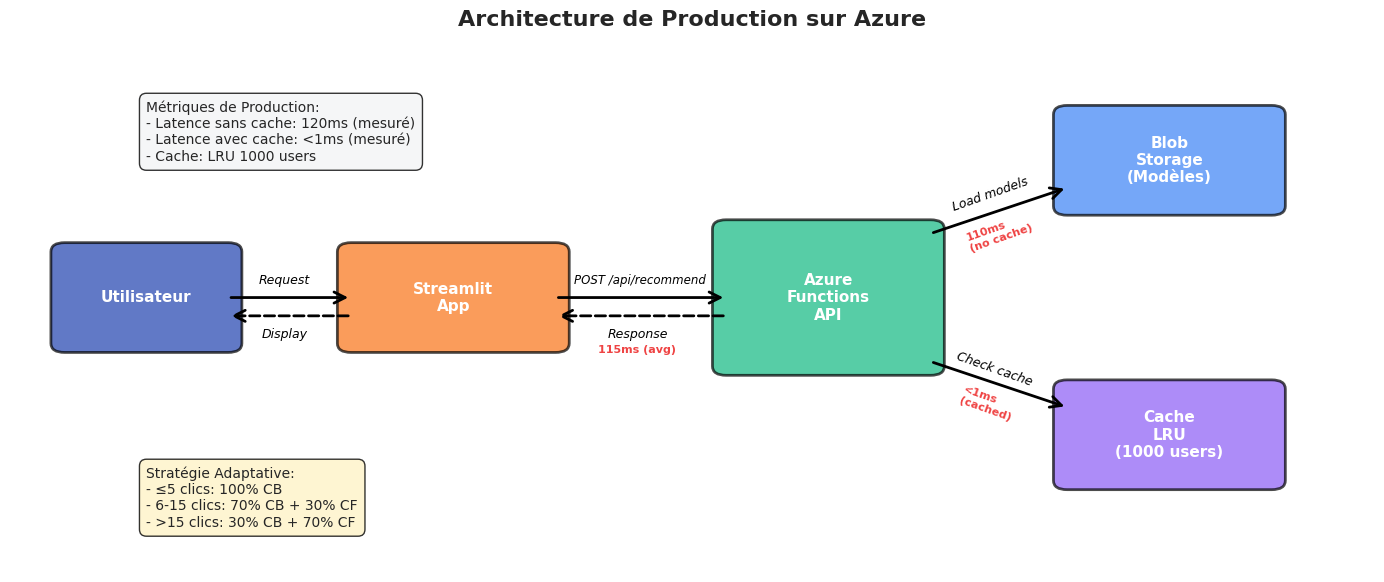

✓ Graphique sauvegardé : presentation/nb04_03_azure_architecture.png


In [11]:
# ============================================
# GRAPHIQUE 8: Architecture Azure Functions (nb04_03)
# ============================================

print("\n3. Création du diagramme d'architecture Azure...")

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Composants de l'architecture
components = {
    'user': {'pos': (1, 3), 'size': (1.2, 1), 'color': colors['primary'], 'label': 'Utilisateur'},
    'streamlit': {'pos': (3.25, 3), 'size': (1.5, 1), 'color': colors['moderate'], 'label': 'Streamlit\nApp'},
    'api': {'pos': (6.0, 3), 'size': (1.5, 1.5), 'color': colors['hybrid'], 'label': 'Azure\nFunctions\nAPI'},
    'blob': {'pos': (8.5, 4.5), 'size': (1.5, 1), 'color': colors['cb'], 'label': 'Blob\nStorage\n(Modèles)'},
    'cache': {'pos': (8.5, 1.5), 'size': (1.5, 1), 'color': colors['cf'], 'label': 'Cache\nLRU\n(1000 users)'}
}

# Dessiner les composants
for comp_name, comp_info in components.items():
    rect = FancyBboxPatch(
        (comp_info['pos'][0] - comp_info['size'][0]/2, 
         comp_info['pos'][1] - comp_info['size'][1]/2),
        comp_info['size'][0], comp_info['size'][1],
        boxstyle="round,pad=0.1",
        facecolor=comp_info['color'],
        edgecolor='black',
        alpha=0.7,
        linewidth=2
    )
    ax.add_patch(rect)
    ax.text(comp_info['pos'][0], comp_info['pos'][1], comp_info['label'],
           ha='center', va='center', fontsize=11, weight='bold', color='white')

# Dessiner toutes les flèches
arrow_configs = [
    # Flux aller
    ((1.6, 3), (2.5, 3), 'solid'),      # User -> Streamlit
    ((4.00, 3), (5.25, 3), 'solid'),     # Streamlit -> API
    ((6.75, 3.7), (7.75, 4.2), 'solid'), # API -> Blob
    ((6.75, 2.3), (7.75, 1.8), 'solid'), # API -> Cache
    # Flux retour
    ((5.25, 2.8), (4.00, 2.8), 'dashed'),  # API -> Streamlit (response)
    ((2.50, 2.8), (1.6, 2.8), 'dashed')    # Streamlit -> User (display)
]

for start, end, style in arrow_configs:
    arrow = FancyArrowPatch(
        start, end, 
        arrowstyle='->', 
        mutation_scale=20,
        linewidth=2, 
        color='black', 
        linestyle=style,
        connectionstyle="arc3,rad=0"
    )
    ax.add_patch(arrow)

# Positionner tous les textes manuellement sans chevauchement
# Labels en noir italique
ax.text(2.01, 3.15, 'Request', ha='center', fontsize=9, style='italic', color='black')
ax.text(4.62, 3.15, 'POST /api/recommend', ha='center', fontsize=8.5, style='italic', color='black')
ax.text(6.9, 3.95, 'Load models', ha='left', fontsize=9, style='italic', color='black', rotation=19.5)
ax.text(6.9, 2.04, ' Check cache', ha='left', fontsize=9, style='italic', color='black', rotation=-19.5)
ax.text(4.60, 2.56, 'Response', ha='center', fontsize=9, style='italic', color='black')
ax.text(2.01, 2.56, 'Display', ha='center', fontsize=9, style='italic', color='black')

# Temps en rouge gras
ax.text(7.0, 3.50, '110ms\n(no cache)', ha='left', fontsize=8, weight='bold', color=colors['cold'], rotation=19.5)
ax.text(6.95, 1.65, '<1ms\n(cached)', ha='left', fontsize=8, weight='bold', color=colors['cold'], rotation=-19.5)
ax.text(4.60, 2.40, '115ms (avg)', ha='center', fontsize=8, weight='bold', color=colors['cold'])

# Métriques clés (en haut à gauche)
metrics_text = """Métriques de Production:
- Latence sans cache: 120ms (mesuré)
- Latence avec cache: <1ms (mesuré)
- Cache: LRU 1000 users"""

ax.text(1, 4.5, metrics_text, fontsize=10, 
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#f3f4f6', alpha=0.8))

# Stratégie hybride (en bas à gauche)
strategy_text = """Stratégie Adaptative:
- ≤5 clics: 100% CB
- 6-15 clics: 70% CB + 30% CF
- >15 clics: 30% CB + 70% CF"""

ax.text(1, 0.5, strategy_text, fontsize=10,
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#fef3c7', alpha=0.8))

ax.set_title('Architecture de Production sur Azure', fontsize=16, weight='bold', y=0.98)

# plt.tight_layout()
# plt.savefig(f'{output_dir}/04_azure_architecture.png', dpi=300, bbox_inches='tight')
# plt.show()

# print(f"✓ Graphique sauvegardé : {output_dir}/04_azure_architecture.png")

plt.tight_layout()
plt.savefig(f'{output_dir}/nb04_03_azure_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Graphique sauvegardé : {output_dir}/nb04_03_azure_architecture.png")